# Future Years

PyPSA-GB can model the GB power system  by solving a network constrained Linear Optimal Power Flow (LOPF) problem. This notebook shows the example application of a FES 2022.

In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs
import data_reader_writer

## Setting up simulation

Set the required inputs for the LOPF: the start, end and year of simulation, and the timestep.

The HVDC links used as an interconnector for import and export between GB and nearby regions such as Norway, N.Ireland, France are disregarded in this optimal economic dispatch analysis.

In [3]:
df_network=pd.read_csv('LOPF_data_heat_2022/buses.csv')
cols=df_network.name.values[29:].tolist()
cols=['Timestamp']+cols
cols

['Timestamp',
 'Beauly',
 'Peterhead',
 'Errochty',
 'Denny/Bonnybridge',
 'Neilston',
 'Strathaven',
 'Torness',
 'Eccles',
 'Harker',
 'Stella West',
 'Penwortham',
 'Deeside',
 'Daines',
 'Th. Marsh/Stocksbridge',
 'Thornton/Drax/Eggborough',
 'Keadby',
 'Ratcliffe',
 'Feckenham',
 'Walpole',
 'Bramford',
 'Pelham',
 'Sundon/East Claydon',
 'Melksham',
 'Bramley',
 'London',
 'Kemsley',
 'Sellindge',
 'Lovedean',
 'S.W.Penisula']

In [4]:
heating_EDRP=pd.read_csv('REMA/domestic_EDRP/2050/scaled with normalised profiles/hourly heat demand total_withGasboilers_MW.csv')
heating_EDRP_DHN=pd.read_csv('REMA/domestic_EDRP_DHN/2050/scaled with normalised profiles/hourly heat demand total_withDHN_MW.csv')
heating_RHPP=pd.read_csv('REMA/domestic_RHPP/2050/scaled with normalised profiles/hourly heat demand total_withHPs_MW.csv')

In [5]:
heating_EDRP.columns=cols
heating_EDRP_DHN.columns=cols
heating_RHPP.columns=cols
heating_RHPP

,Timestamp,Beauly,Peterhead,Errochty,Denny/Bonnybridge,Neilston,Strathaven,Torness,Eccles,Harker,...,Bramford,Pelham,Sundon/East Claydon,Melksham,Bramley,London,Kemsley,Sellindge,Lovedean,S.W.Penisula
0,01/01/2050 00:00,363.114531,1390.942531,511.959934,4723.969618,793.453041,8791.762574,1663.298451,531.546807,966.349815,...,2711.114527,1420.830281,4172.961722,5188.368291,3714.139290,20539.70453,5202.573462,1107.317502,5111.837340,2376.984511
1,01/01/2050 01:00,363.114531,1491.085478,511.959934,4723.969618,793.453041,8791.762574,2030.144900,648.781364,1093.582686,...,3068.068995,1420.830281,4722.387915,5871.486333,4203.155377,23244.03120,5202.573462,1253.110653,5784.879059,2547.125752
2,01/01/2050 02:00,363.114531,1664.953295,671.058534,6192.008228,793.453041,8791.762574,2351.441656,751.459428,966.349815,...,3553.630699,1420.830281,4172.961722,6800.725183,4868.359219,26922.70055,6819.344807,1451.431664,5784.879059,2547.125752
3,01/01/2050 03:00,459.302456,1863.908046,755.849386,6974.392521,1171.441267,12980.016400,2648.555444,846.409246,1426.703275,...,4002.645742,1420.830281,6160.893354,6800.725183,4203.155377,30324.48835,7680.995514,1634.825693,7547.034167,3323.015897
4,01/01/2050 04:00,545.210340,2047.349856,755.849386,6974.392521,1171.441267,12980.016400,2857.998318,913.341727,1539.524336,...,4319.167577,1420.830281,6648.085424,8265.763721,5917.120003,32722.49290,8288.394456,1634.825693,8143.839694,3585.793859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31/12/2050 19:00,1240.171493,3718.138781,1764.413251,16280.638460,3105.323106,34408.165380,5368.358491,1715.587368,5142.595754,...,5706.552817,2609.494314,4172.961722,15042.740600,4868.359219,31703.28839,7335.305440,1323.135202,9388.391177,7612.247428
8756,31/12/2050 20:00,1240.171493,4737.042448,2244.218544,20707.909950,3086.351314,34197.950680,4907.352281,1568.261807,5352.054326,...,4002.645742,2609.494314,7731.414884,15042.740600,4203.155377,31703.28839,5202.573462,1673.559413,9388.391177,4570.640711
8757,31/12/2050 21:00,1240.171493,3938.358340,2244.218544,20707.909950,3105.323106,34408.165380,5368.358491,1715.587368,3579.445601,...,3208.889291,1420.830281,7731.414884,13728.829820,4797.123594,35438.56430,7270.608673,1684.292576,10878.978390,6116.637034
8758,31/12/2050 22:00,1240.171493,6111.556800,2244.218544,20707.909950,3041.600575,33702.095410,7739.964379,2473.490760,4727.280500,...,3208.889291,2609.494314,6395.446216,23641.812540,9156.059539,26528.75769,6719.561643,1246.913122,8143.839694,8146.387780


In [6]:
total_heating_demand=heating_EDRP_DHN+heating_RHPP+heating_EDRP

In [7]:
total_heating_demand['Timestamp']=heating_EDRP['Timestamp']           # overriding the timestamp since that altered during addition


In [8]:
total_heating_demand = total_heating_demand.reset_index(drop=True)
total_heating_demand.set_index('Timestamp')

,Beauly,Peterhead,Errochty,Denny/Bonnybridge,Neilston,Strathaven,Torness,Eccles,Harker,Stella West,...,Bramford,Pelham,Sundon/East Claydon,Melksham,Bramley,London,Kemsley,Sellindge,Lovedean,S.W.Penisula
Timestamp,,,,,,,,,,,,,,,,,,,,,
01/01/2050 00:00,1116.254341,1618.971232,1085.704450,5215.497363,2864.012213,9216.767076,2570.182367,1599.059810,1489.868557,7567.817650,...,4293.799473,2805.942173,6010.080243,8447.804219,5715.048784,27281.626761,6364.001751,1422.989810,6959.040268,3986.695624
01/01/2050 01:00,1116.254341,1690.303657,1085.704450,5215.497363,2864.012213,9216.767076,2888.451998,1659.113527,1548.566172,7814.362805,...,4443.560370,2805.942173,6319.004277,8704.220680,5942.120392,29103.350141,6364.001751,1527.457445,7390.259650,3741.278575
01/01/2050 02:00,1116.254341,1865.988981,1171.011014,6620.318231,2864.012213,9216.767076,3212.018160,1764.462959,1489.868557,9999.746123,...,4932.758941,2805.942173,6010.080243,9640.949416,6611.922143,32797.511814,7831.396231,1726.503842,7390.259650,3741.278575
01/01/2050 03:00,1248.646683,2107.040734,1353.350346,7486.272446,3327.733937,13422.618623,3677.043766,2057.065470,1971.898815,11361.390918,...,5650.863284,2805.942173,8074.079538,9640.949416,5942.120392,37345.566372,8890.513861,1963.568718,9470.722313,4753.939903
01/01/2050 04:00,1940.723093,2481.119913,1353.350346,7486.272446,3327.733937,13422.618623,4694.599776,3075.245697,2513.095842,7814.362805,...,7262.437499,2805.942173,10064.517543,14327.235242,9638.149096,45260.235784,10448.266487,1963.568718,11579.025471,6141.036405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/12/2050 19:00,11793.144141,4566.932243,8998.412080,22478.015572,37279.964914,41422.877550,11728.690576,9202.474152,15440.935812,37078.983205,...,19188.159575,9059.098076,6010.080243,38907.540803,6611.922143,85479.915353,16214.487341,2289.297437,17989.665211,25130.257944
31/12/2050 20:00,11793.144141,6458.967915,13470.022422,30325.072141,39068.934773,41583.762286,14313.131992,12640.011974,18440.050576,48552.738235,...,5650.863284,9059.098076,17983.037925,38907.540803,5942.120392,85479.915353,6364.001751,4164.998240,17989.665211,11504.448125
31/12/2050 21:00,11793.144141,4541.278097,13470.022422,30325.072141,37279.964914,41422.877550,11728.690576,9202.474152,9617.032115,46290.281937,...,7881.707675,2805.942173,17983.037925,32276.467137,10901.413660,63991.342544,12857.787115,4290.212544,13642.176359,10451.685386


In [9]:
total_heating_demand.to_csv('LOPF_data_heat_2050/total_heating_demand.csv',index=False,header=True)

In [10]:
network = pypsa.Network()
network.import_from_csv_folder('LOPF_data_heat_2050')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data_heat_2050 has buses, generators, lines, links, loads, storage_units


A boiler at each heat nodes is integrated and added as a generator compoenent which is used as a back up heating source to the storage and the heat pump units to meet the hour by hour heat demand for the yearly operating period. The nominal capcity of the boiler is allwed to be extendable so that the optimisation algorithm will dispatch the needed optimal back up boiler capcity.

In [11]:
for i in range(29):
    network.add(
        "Generator",
        "boiler {}".format(i+1),
       bus='Heat Bus {}'.format(i+1),
       p_nom_extendable=True,
        ramp_limit_up=1,
        ramp_limit_down=1,
        efficiency=0.80,
        marginal_cost=20.0,
        carrier="heat",
    )

Links need to be scaled up to accomadate for future generation.

In [12]:
contingency_factor = 0.7
network.lines.s_max_pu *= contingency_factor

In [13]:
network.generators

,carrier,type,p_nom,bus,marginal_cost,ramp_limit_up,ramp_limit_down,p_max_pu,control,p_nom_extendable,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
West Burton,Coal,Conventional steam,0.000000,Keadby,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Sutton Bridge CCS Gas,CCS Gas,CCS Gas,116.671400,Walpole,100.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Baglan Bay CCS Gas,CCS Gas,CCS Gas,74.077080,Melksham,100.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Severn Power CCS Gas,CCS Gas,CCS Gas,121.087540,Melksham,100.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Blackburn CCS Gas,CCS Gas,CCS Gas,8.547356,Penwortham,100.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
boiler 25,heat,,0.000000,Heat Bus 25,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
boiler 26,heat,,0.000000,Heat Bus 26,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
boiler 27,heat,,0.000000,Heat Bus 27,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


In [14]:
network.consistency_check()

## Running the optimisation

In [15]:
#network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)

In [16]:
#network.model
Linopy_model=network.optimize.create_model()

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


In [17]:
#network.model.constraints.remove("Kirchhoff-Voltage-Law")    #Removing the Kirchoff's Voltage Law constraints which converts to a transport model
#network.optimize(solver_name='gurobi')

In [18]:
def remove_kvl(network, sns):
    print("KVL removed!")
    #network.model.constraints.remove("Kirchhoff-Voltage-Law")
network.optimize(solver_name='gurobi',extra_functionality=remove_kvl)


C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
INFO:linopy.model: Solve linear problem using Gu

KVL removed!


Writing variables.: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.28s/it]

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-29


Read LP format model from file C:\Users\salene\AppData\Local\Temp\linopy-problem-eqzh7d22.lp
Reading time = 44.36 seconds
obj: 28661856 rows, 9075419 columns, 51655727 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 28661856 rows, 9075419 columns and 51655727 nonzeros
Model fingerprint: 0xf282ed3a
Coefficient statistics:
  Matrix range     [6e-05, 3e+03]
  Objective range  [1e+00, 1e+09]
  Bounds range     [1e+07, 1e+07]
  RHS range        [1e-06, 7e+12]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 25359348 rows and 1253894 columns (presolve time = 5s) ...
Presolve removed 25359348 rows and 2510210 columns (presolve time = 10s) ...
Presolve removed 25832428 rows and 2986393 columns (presolve tim

  87   1.07376086e+11  1.06144723e+11  1.20e-03 2.17e-05  1.02e+02  1087s
  88   1.07351884e+11  1.06163052e+11  1.16e-03 1.99e-05  9.89e+01  1099s
  89   1.07334750e+11  1.06177641e+11  1.13e-03 2.00e-05  9.62e+01  1111s
  90   1.07316350e+11  1.06196346e+11  1.09e-03 2.00e-05  9.31e+01  1124s
  91   1.07290865e+11  1.06214362e+11  1.05e-03 1.82e-05  8.95e+01  1137s
  92   1.07269960e+11  1.06228707e+11  1.01e-03 1.64e-05  8.66e+01  1148s
  93   1.07251547e+11  1.06236729e+11  9.76e-04 1.28e-05  8.44e+01  1158s
  94   1.07231376e+11  1.06248467e+11  9.38e-04 1.46e-05  8.17e+01  1170s
  95   1.07214507e+11  1.06255144e+11  9.08e-04 1.28e-05  7.98e+01  1183s
  96   1.07200625e+11  1.06271443e+11  8.83e-04 1.29e-05  7.73e+01  1194s
  97   1.07185359e+11  1.06282400e+11  8.54e-04 1.29e-05  7.51e+01  1205s
  98   1.07178343e+11  1.06291909e+11  8.41e-04 9.19e-06  7.37e+01  1216s
  99   1.07159512e+11  1.06304196e+11  8.04e-04 1.11e-05  7.11e+01  1227s
 100   1.07147748e+11  1.06310798e+11 

 198   1.06774038e+11  1.06712475e+11  3.66e-05 2.69e-05  5.12e+00  2440s
 199   1.06773332e+11  1.06713931e+11  3.53e-05 2.69e-05  4.94e+00  2454s
 200   1.06772842e+11  1.06714862e+11  3.45e-05 2.69e-05  4.82e+00  2467s
 201   1.06771749e+11  1.06715856e+11  3.26e-05 2.91e-05  4.65e+00  2480s
 202   1.06771197e+11  1.06716989e+11  3.15e-05 2.71e-05  4.51e+00  2493s
 203   1.06770851e+11  1.06718101e+11  3.08e-05 2.71e-05  4.39e+00  2507s
 204   1.06770084e+11  1.06719135e+11  2.92e-05 2.72e-05  4.24e+00  2521s
 205   1.06769578e+11  1.06720271e+11  2.84e-05 2.51e-05  4.10e+00  2534s
 206   1.06769093e+11  1.06721045e+11  2.77e-05 2.52e-05  4.00e+00  2547s
 207   1.06768620e+11  1.06722149e+11  2.68e-05 2.31e-05  3.86e+00  2561s
 208   1.06768122e+11  1.06722751e+11  2.59e-05 2.31e-05  3.77e+00  2574s
 209   1.06767716e+11  1.06723786e+11  2.51e-05 2.53e-05  3.65e+00  2586s
 210   1.06767274e+11  1.06724511e+11  2.43e-05 2.32e-05  3.56e+00  2599s
 211   1.06766867e+11  1.06725510e+11 


Barrier solved model in 308 iterations and 4314.47 seconds (2613.47 work units)
Optimal objective 1.06754448e+11

Crossover log...

  201666 DPushes remaining with DInf 0.0000000e+00              4320s
   35302 DPushes remaining with DInf 0.0000000e+00              4325s
     606 DPushes remaining with DInf 0.0000000e+00              4331s
       0 DPushes remaining with DInf 0.0000000e+00              4336s

Restart crossover...

  201698 DPushes remaining with DInf 0.0000000e+00              4342s
   35322 DPushes remaining with DInf 0.0000000e+00              4349s
    2905 DPushes remaining with DInf 0.0000000e+00              4353s
     612 DPushes remaining with DInf 0.0000000e+00              4356s
       0 DPushes remaining with DInf 0.0000000e+00              4363s

 1525047 PPushes remaining with PInf 1.0917290e+04              4364s
  478635 PPushes remaining with PInf 1.4420280e+05              4443s
  435188 PPushes remaining with PInf 1.4420268e+05              4454s
  4

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 9075419 primals, 28661856 duals
Objective: 1.07e+11
Solver model: available
Solver message: 2



('ok', 'optimal')

In [19]:
network.generators.p_nom_opt.div(1e3) # GW  optimised capacity of generators in GW
network.storage_units.p_nom_opt.div(1e3)  # GW 
#My_network.links_t.efficiency 
network.storage_units

,p_nom,carrier,marginal_cost,max_hours,efficiency_store,efficiency_dispatch,state_of_charge_initial,bus,standing_loss,capital_cost,...,q_set,sign,build_year,lifetime,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
Dinorwig,1741.158621,Pumped Storage Hydroelectric,0.0,18.448837,0.865,0.865,3.212235e+04,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1741.158621
Ffestiniog,362.741379,Pumped Storage Hydroelectric,0.0,13.624673,0.850,0.850,4.942233e+03,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,362.741379
Cruachan,2316.540541,Pumped Storage Hydroelectric,0.0,56.530656,0.865,0.865,1.309556e+05,Errochty,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,2316.540541
Foyers,1579.459459,Pumped Storage Hydroelectric,0.0,73.571131,0.865,0.865,1.162026e+05,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1579.459459
Beauly Battery,511.679160,Battery,0.0,1.798337,0.950,0.950,9.201714e+02,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,511.679160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STES_London,504.000000,Seasonal Thermal Energy Storage,0.0,2880.000000,0.900,0.950,1.440000e+06,Heat Bus 25,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.817318
STES_Kemsley,505.000000,Seasonal Thermal Energy Storage,0.0,2880.000000,0.900,0.950,1.440000e+06,Heat Bus 26,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.817318
STES_Sellindge,506.000000,Seasonal Thermal Energy Storage,0.0,2880.000000,0.900,0.950,1.440000e+06,Heat Bus 27,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.817318


In [20]:
network.storage_units.index[120:150]
#network.storage_units.p_nom_opt[4:33].div(1e3).values

Index(['STES_Beauly', 'STES_Peterhead', 'STES_Errochty',
       'STES_Denny/BonnyBdige', 'STES_Neilston', 'STES_Strathaven',
       'STES_Torness', 'STES_Eccles', 'STES_Harker', 'STES_Stella West',
       'STES_Penwortham', 'STES_Deeside', 'STES_Daines',
       'STES_Marsh_Stocksbridge', 'STES_Thornton_Drax_Eggborough',
       'STES_Keadby', 'STES_Ratcliffe', 'STES_Feckenham', 'STES_Walpole',
       'STES_Bramford', 'STES_Pelham', 'STES_Sundon_East_Claydon',
       'STES_Melksham', 'STES_Bramley', 'STES_London', 'STES_Kemsley',
       'STES_Sellindge', 'STES_Lovedean', 'STES_S_W_Penisula'],
      dtype='object', name='StorageUnit')

In [21]:
network.storage_units.index[120:150]

Index(['STES_Beauly', 'STES_Peterhead', 'STES_Errochty',
       'STES_Denny/BonnyBdige', 'STES_Neilston', 'STES_Strathaven',
       'STES_Torness', 'STES_Eccles', 'STES_Harker', 'STES_Stella West',
       'STES_Penwortham', 'STES_Deeside', 'STES_Daines',
       'STES_Marsh_Stocksbridge', 'STES_Thornton_Drax_Eggborough',
       'STES_Keadby', 'STES_Ratcliffe', 'STES_Feckenham', 'STES_Walpole',
       'STES_Bramford', 'STES_Pelham', 'STES_Sundon_East_Claydon',
       'STES_Melksham', 'STES_Bramley', 'STES_London', 'STES_Kemsley',
       'STES_Sellindge', 'STES_Lovedean', 'STES_S_W_Penisula'],
      dtype='object', name='StorageUnit')

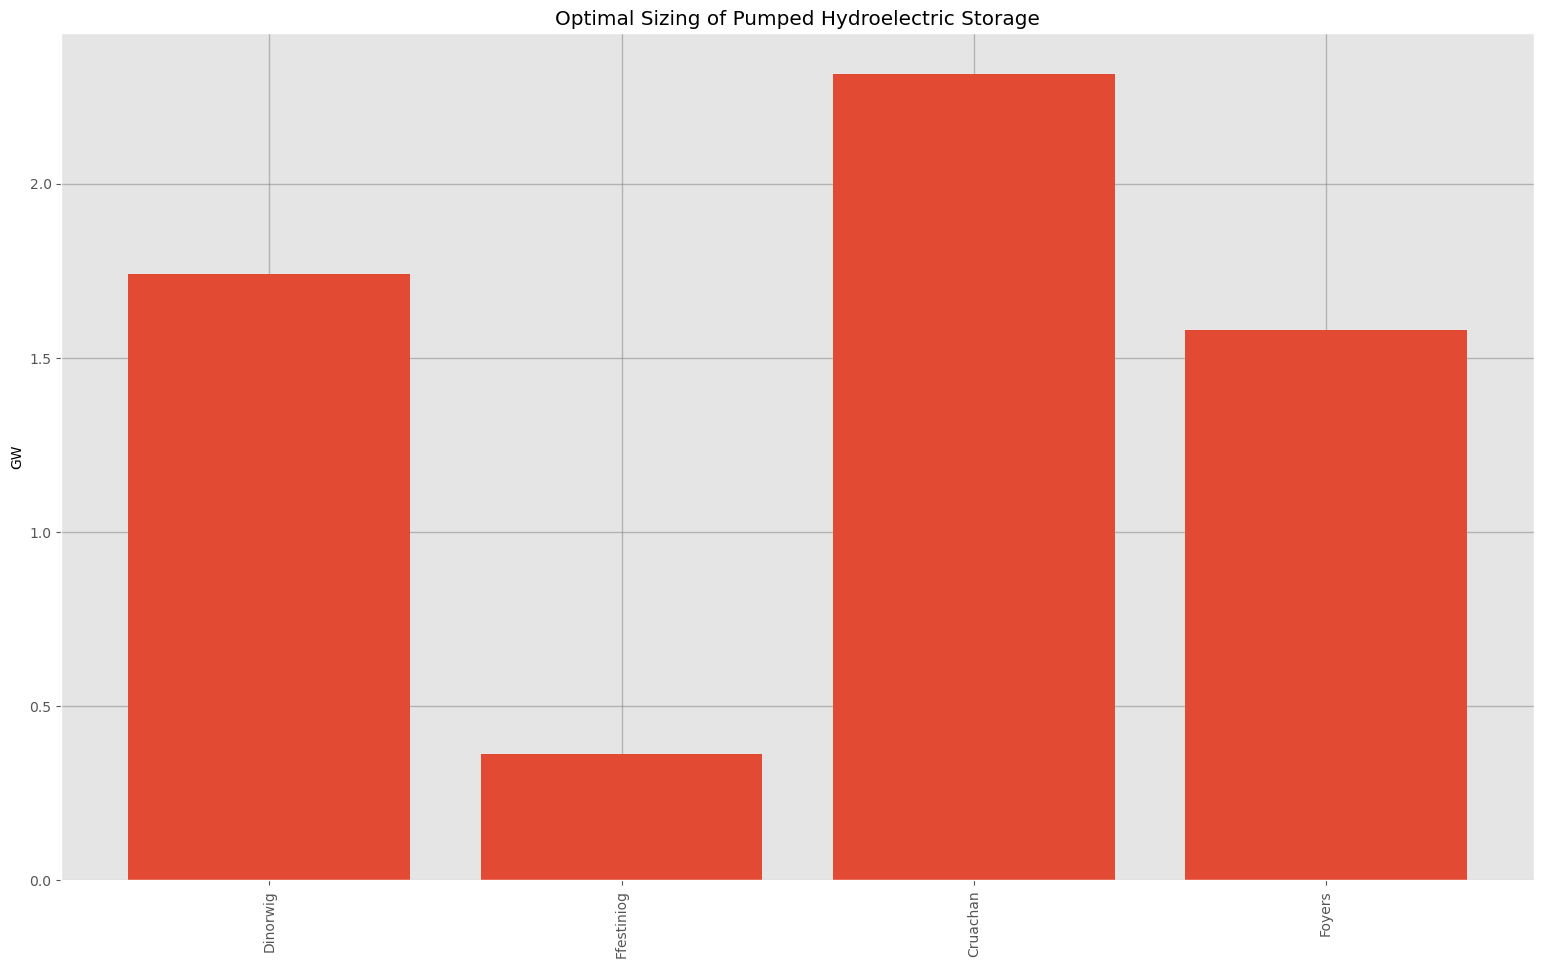

In [22]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[:4], network.storage_units.p_nom_opt[:4].div(1e3).values)

plt.xticks(network.storage_units.index[:4], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Optimal Sizing of Pumped Hydroelectric Storage')
plt.show()

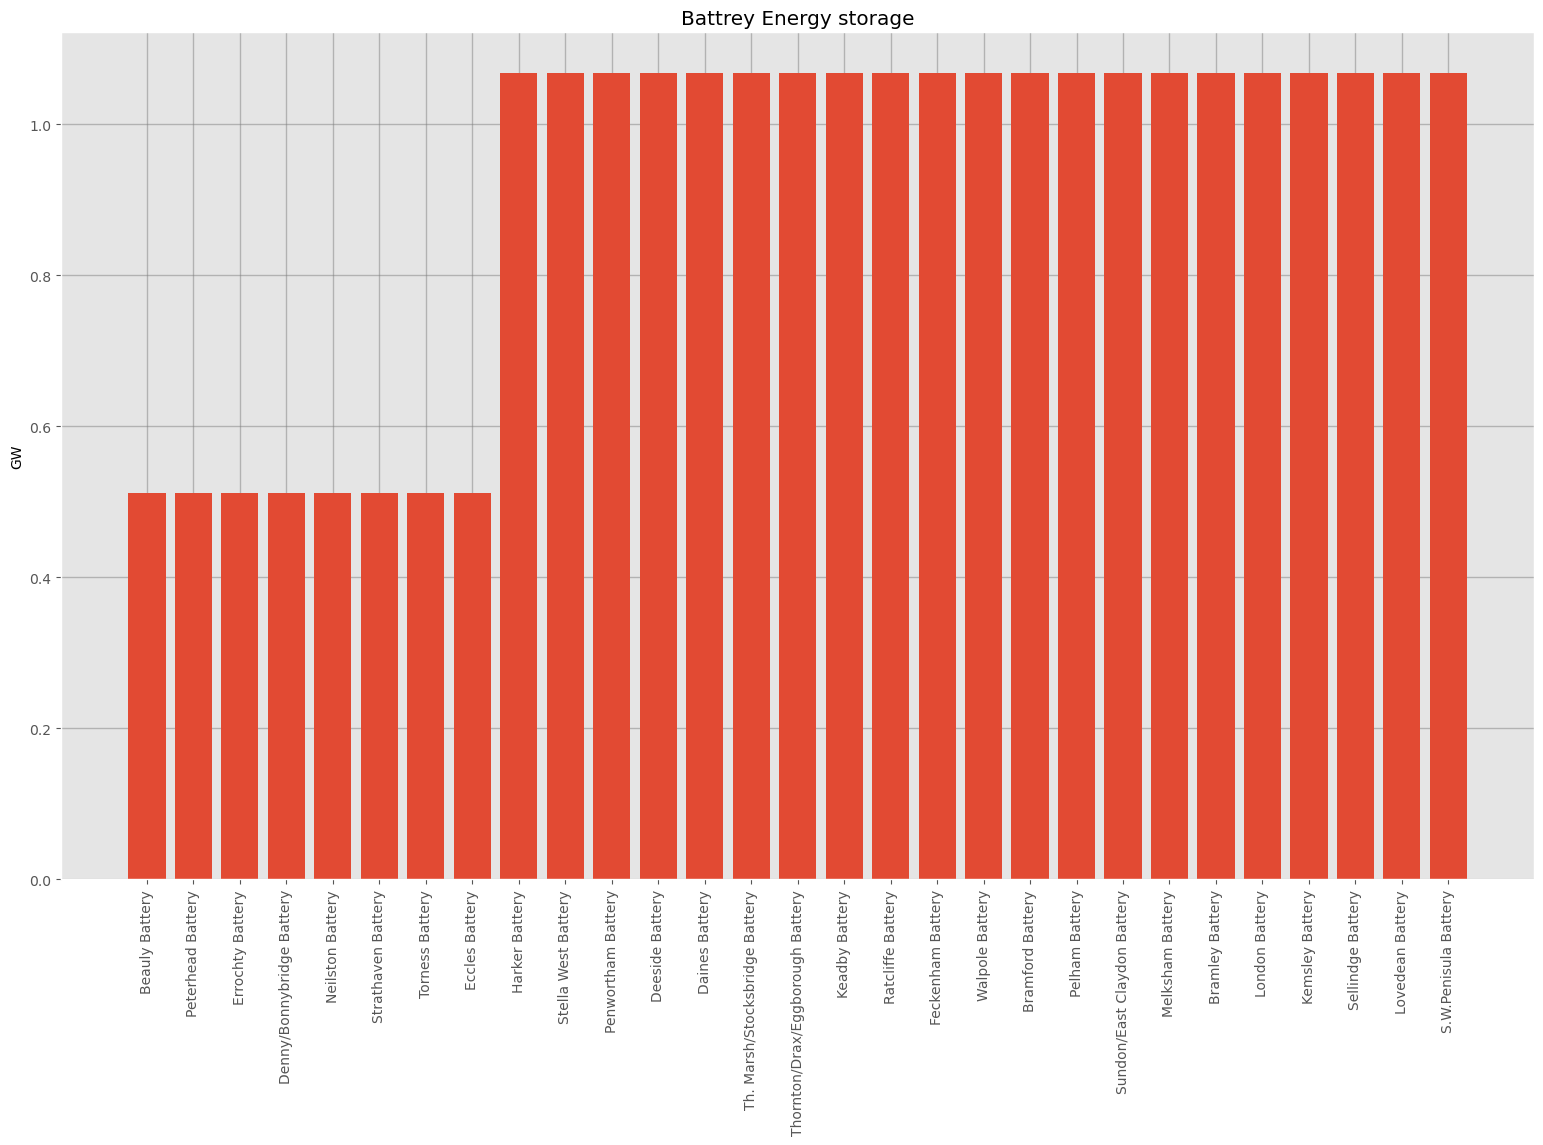

In [23]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[4:33], network.storage_units.p_nom_opt[4:33].div(1e3).values)

plt.xticks(network.storage_units.index[4:33], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Battrey Energy storage')
plt.show()

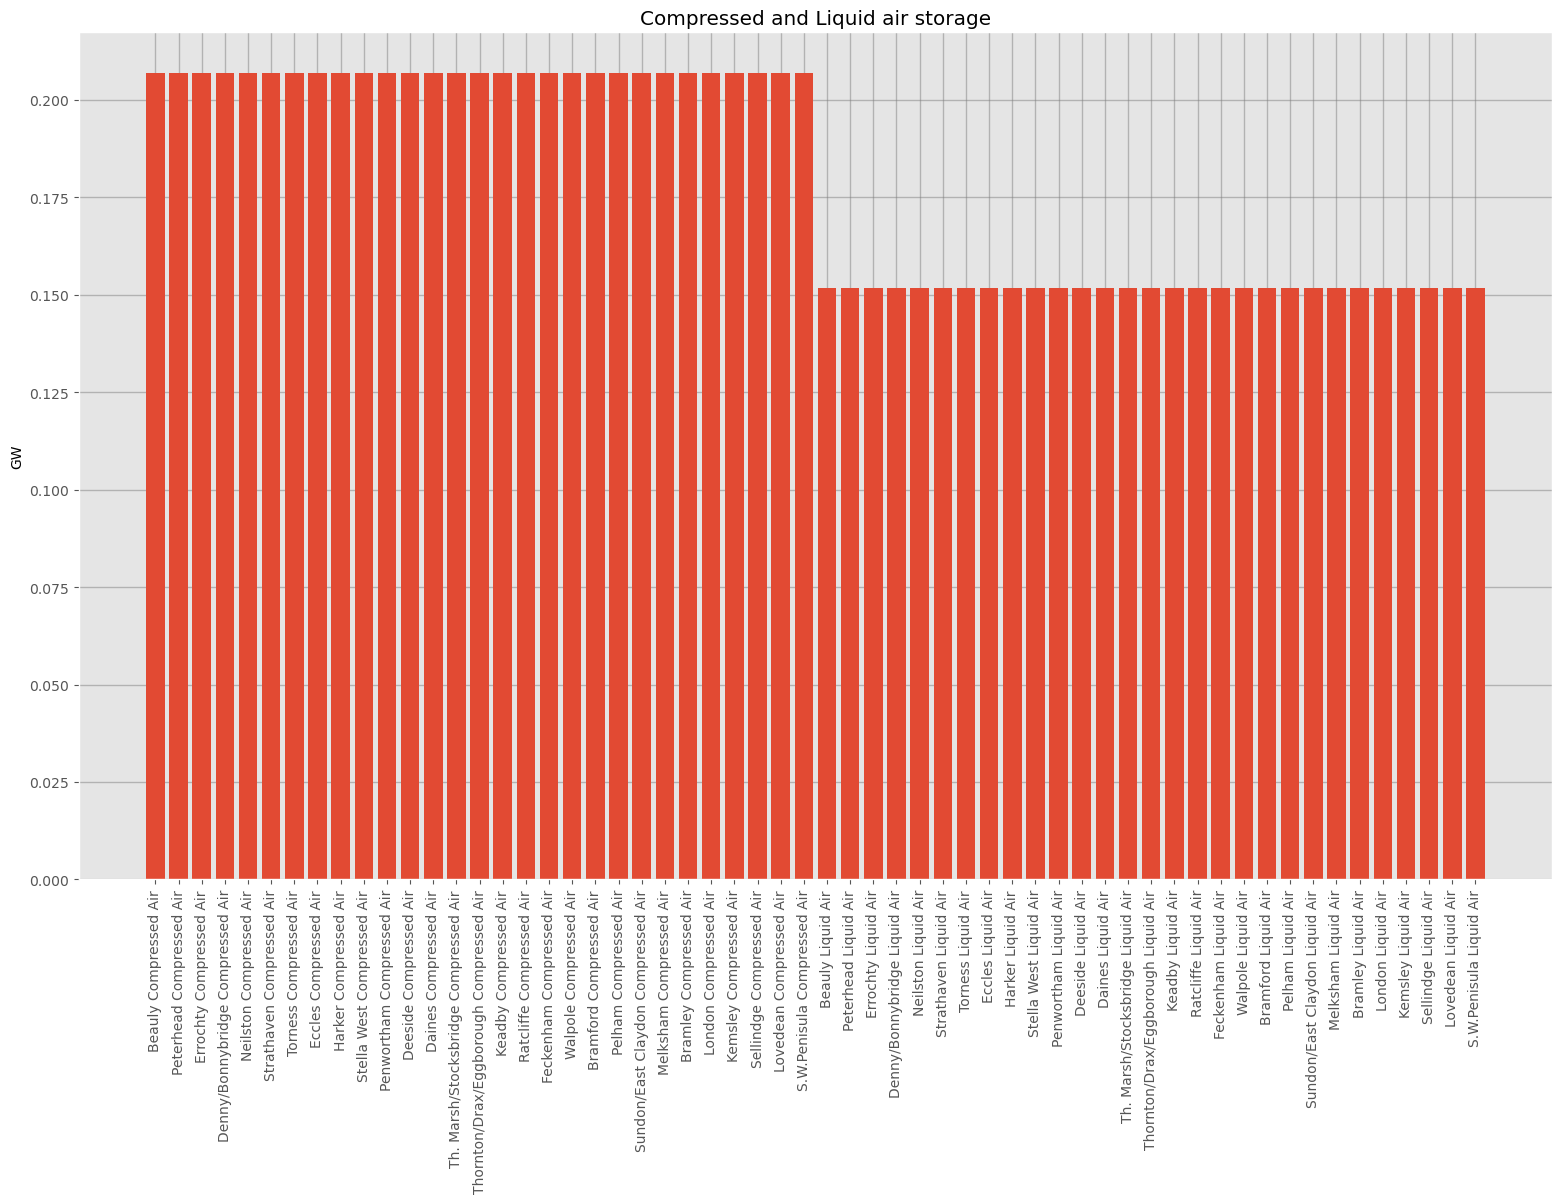

In [24]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[33:91], network.storage_units.p_nom_opt[33:91].div(1e3).values)

plt.xticks(network.storage_units.index[33:91], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Compressed and Liquid air storage')
plt.show()

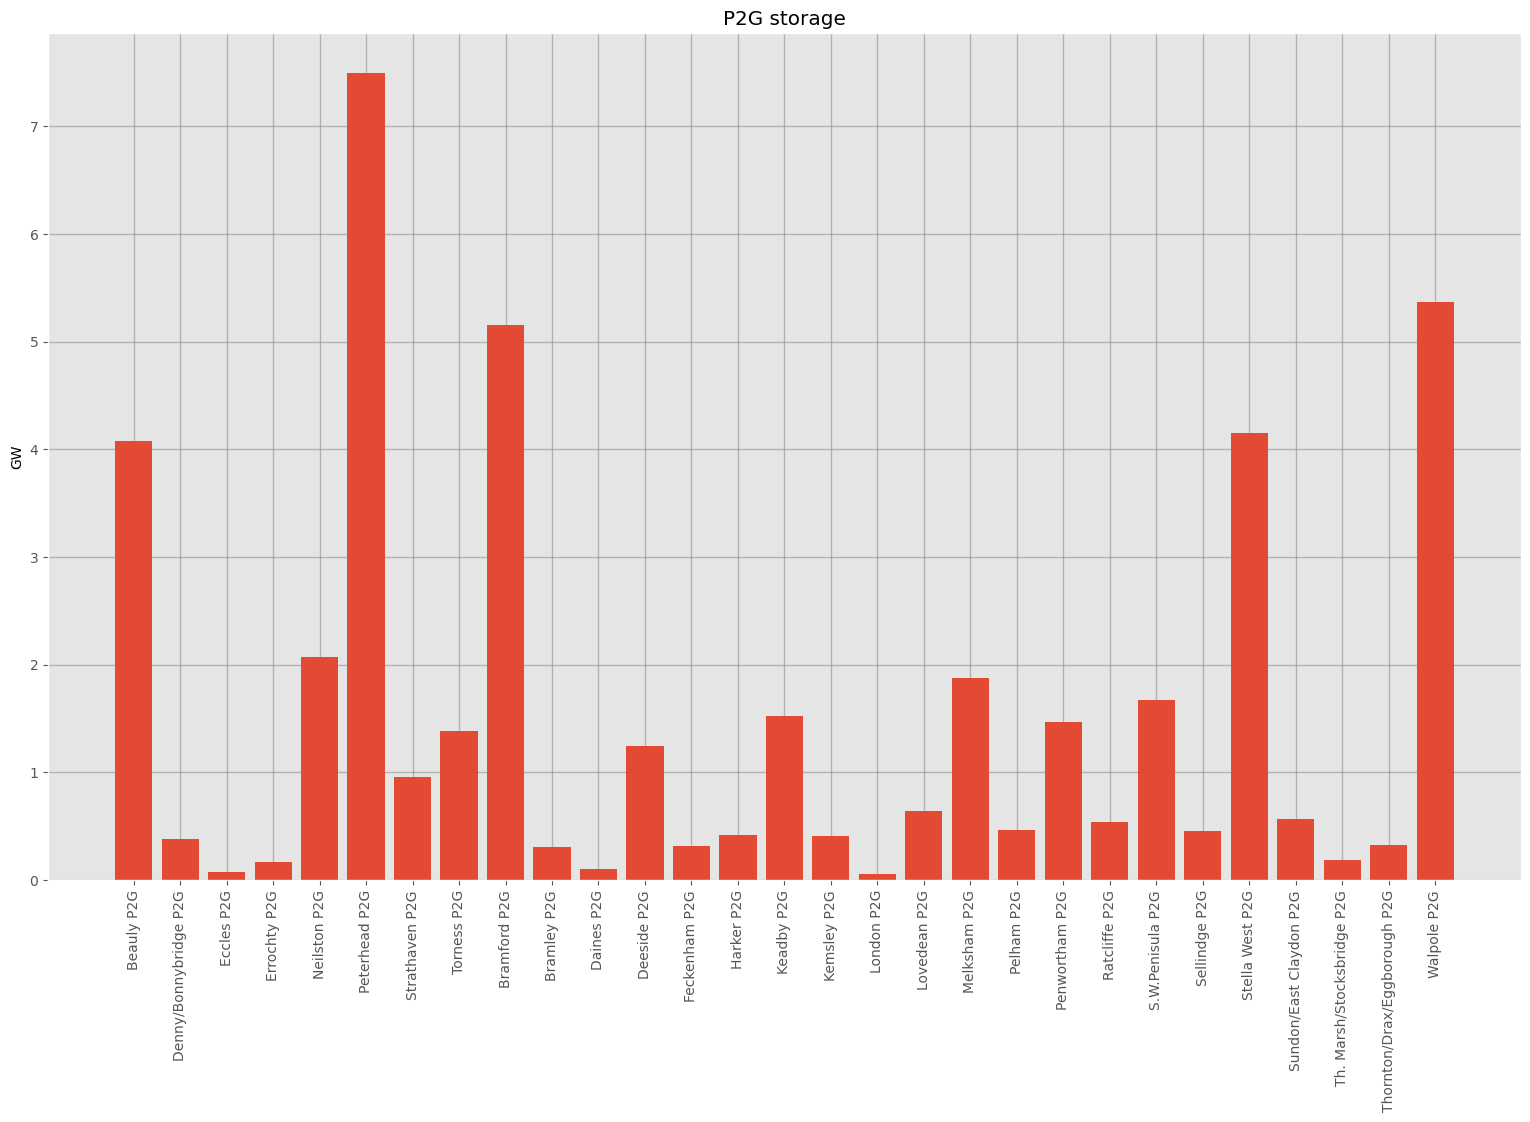

In [25]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[91:120], network.storage_units.p_nom_opt[91:120].div(1e3).values)

plt.xticks(network.storage_units.index[91:120], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('P2G storage')
plt.show()

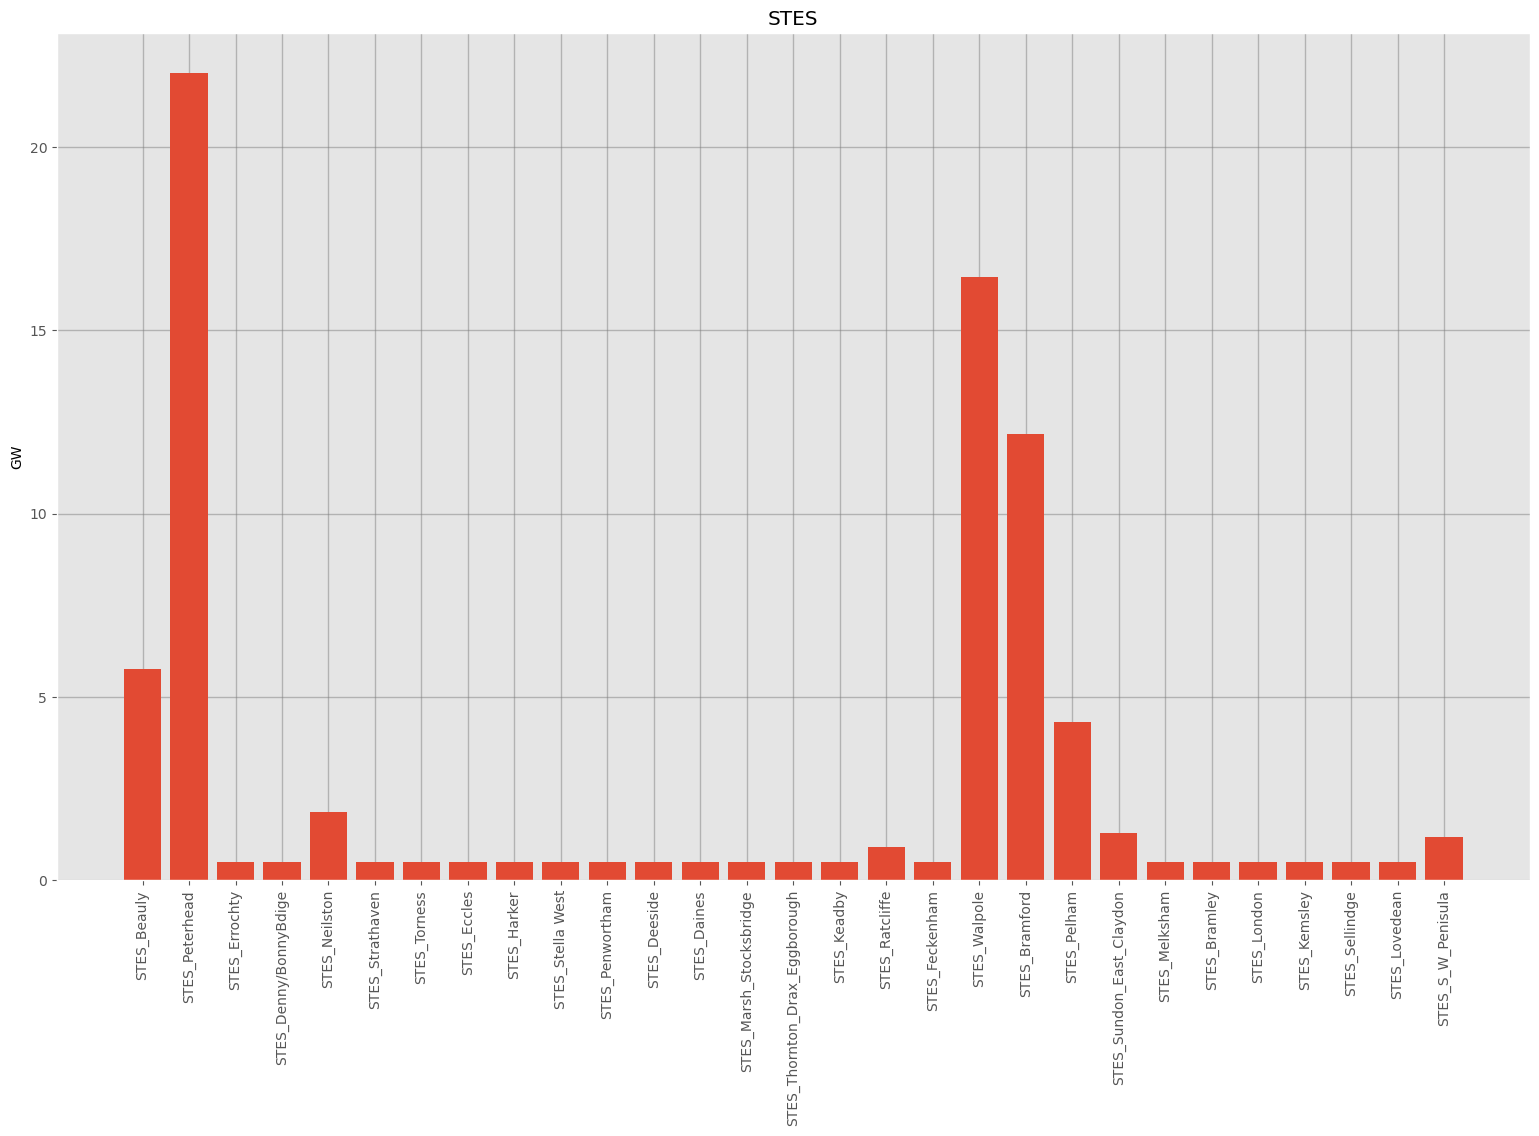

In [26]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[120:150], network.storage_units.p_nom_opt[120:150].div(1e3).values)

plt.xticks(network.storage_units.index[120:150], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('STES')
plt.show()

## Power output by generation type

Group the generators by the carrier, and print their summed power outputs over the simulation period.

In [27]:
year=2050

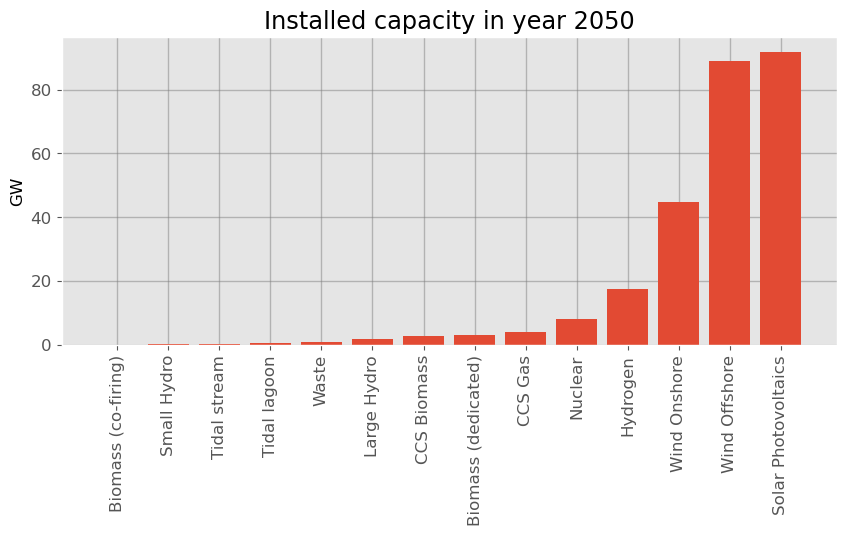

In [28]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

#imp = network.links_t.p0.copy()
#imp[imp < 0] = 0
#imp['Interconnectors Import'] = imp.sum(axis=1)
#interconnector_import = imp[['Interconnectors Import']]

#p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

#exp = network.links_t.p0.copy()
#exp[exp > 0] = 0
#exp['Interconnectors Export'] = exp.sum(axis=1)
#interconnector_export = exp[['Interconnectors Export']]

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

generators_p_nom = network.generators.p_nom.groupby(
    network.generators.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom.drop('Unmet Load', inplace=True)
generators_p_nom.drop(generators_p_nom[generators_p_nom < 50].index, inplace=True)

plt.rcParams.update({'font.size': 12})
# bar chart
plt.figure(figsize=(10,4))
plt.bar(generators_p_nom.index, generators_p_nom.values / 1000)
plt.xticks(generators_p_nom.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Installed capacity in year ' + str(year))
plt.show()

Graph the power output of the different generation types...

Text(0.5, 0, '')

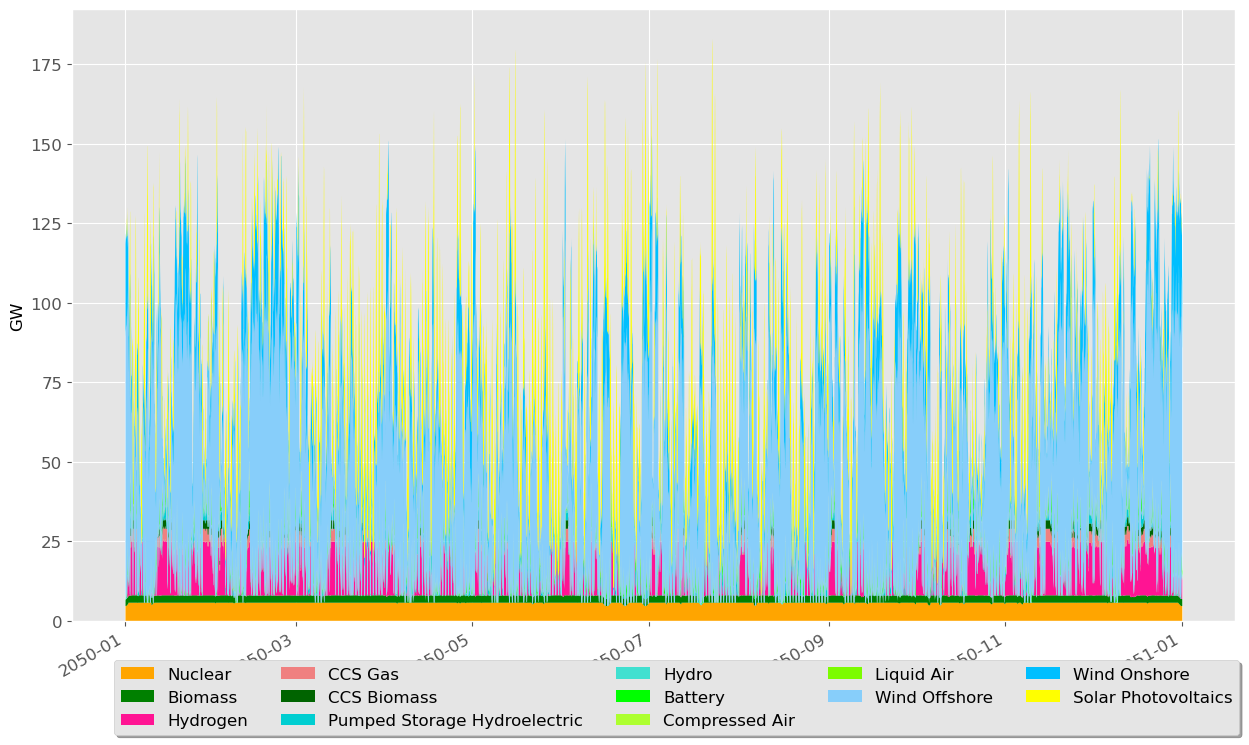

In [29]:
#cols = ["Nuclear", 'Biomass',
        #'Waste', "Oil", "Natural Gas",
       # 'Hydrogen', 'CCS Gas', 'CCS Biomass',
        #"Pumped Storage Hydroelectric", 'Hydro',
        #'Battery', 'Compressed Air', 'Liquid Air',
        #"Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        #'Interconnectors Import', 'Unmet Load'
       # ]
# ignore the import/export since the the highvoltage links are disrgearded

cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
         'Unmet Load'
        ]




p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)

colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          'B6 import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "deeppink",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# # stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
# (interconnector_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# # rescale the y axis
# ax.set_ylim([(interconnector_export / 1e3).sum(axis=1).min(), (p_by_carrier / 1e3).sum(axis=1).max()])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.52, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")

ax.set_xlabel("")

## Plotting storage

Graph the pumped hydro dispatch and state of charge...

Text(0.5, 0, '')

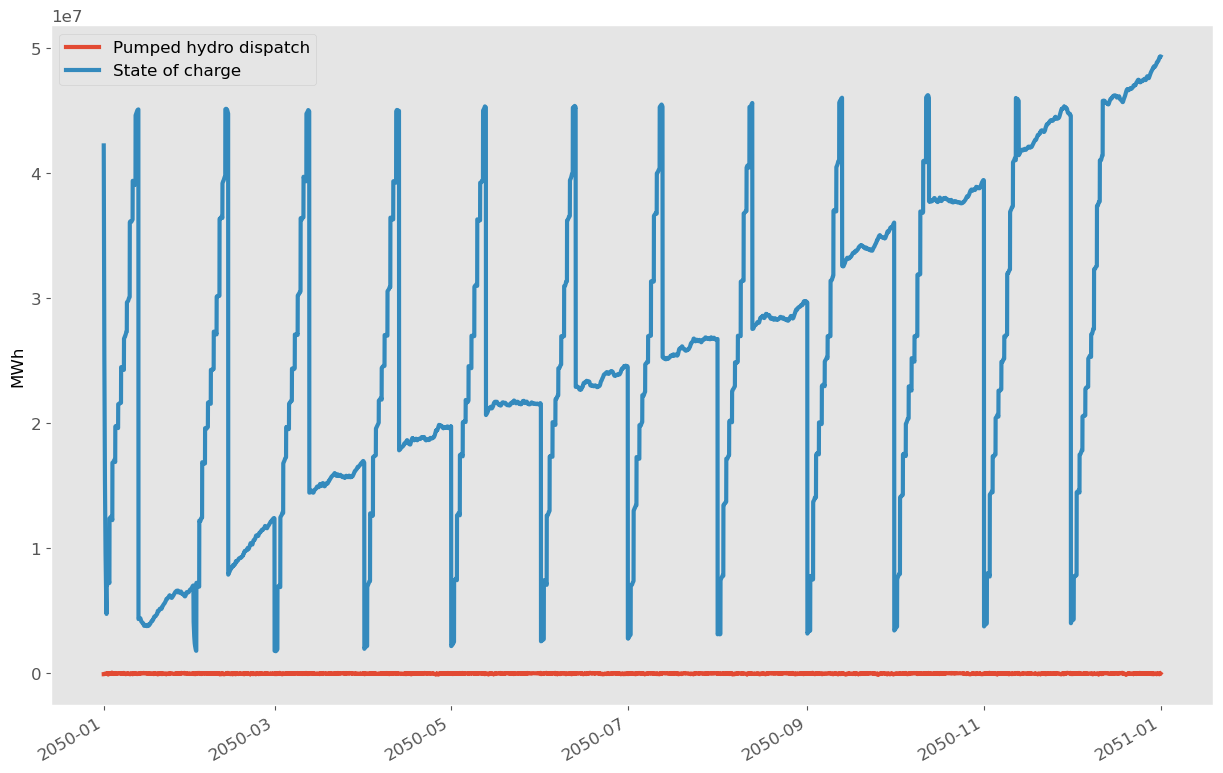

In [30]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

Let us plot the state of charge and dispatch for each type of storages separately

Text(0.5, 0, '')

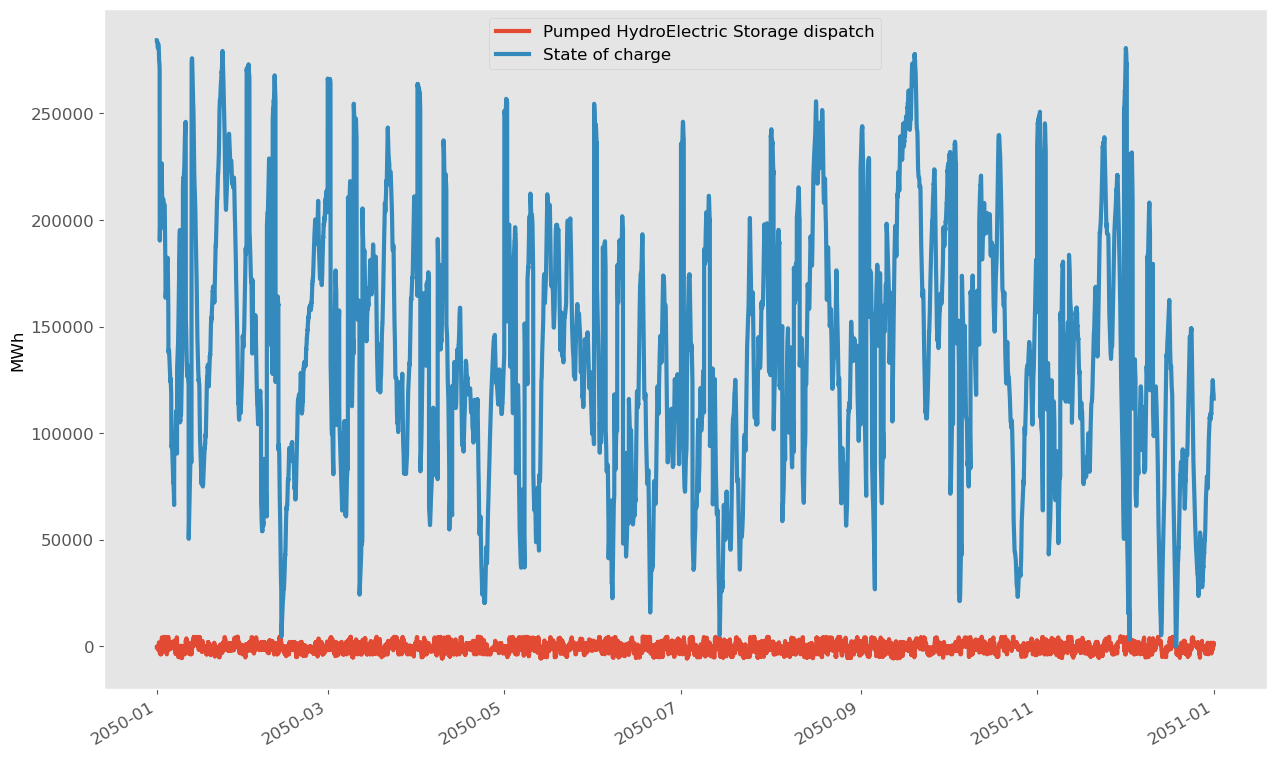

In [31]:
network.storage_units_t.state_of_charge.iloc[: , :4].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , :4].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , :4].sum(axis=1)


p_storage_PumpedHydorES.plot(label="Pumped HydroElectric Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

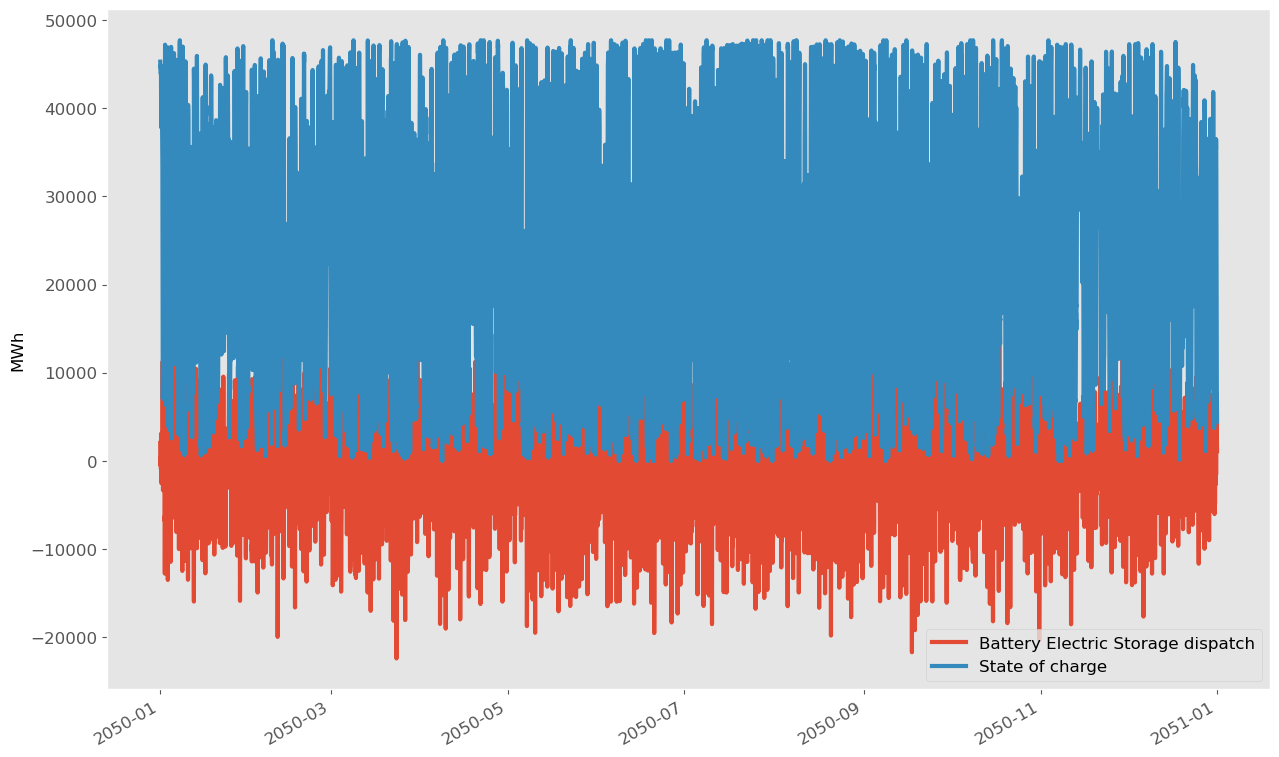

In [32]:
network.storage_units_t.state_of_charge.iloc[: , 4:33].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 4:33].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 4:33].sum(axis=1)


p_storage_PumpedHydorES.plot(label="Battery Electric Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

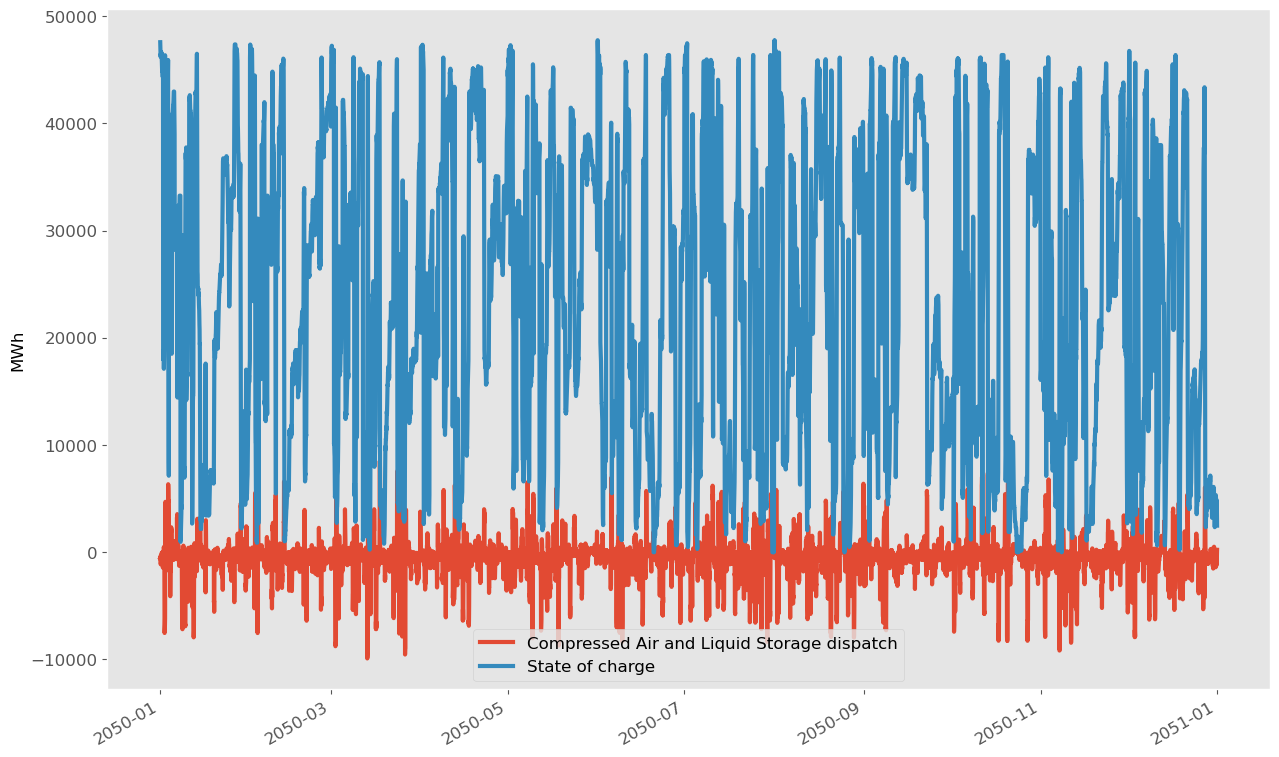

In [33]:
network.storage_units_t.state_of_charge.iloc[: , 33:91].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 33:91].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 33:91].sum(axis=1)


p_storage_PumpedHydorES.plot(label="Compressed Air and Liquid Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

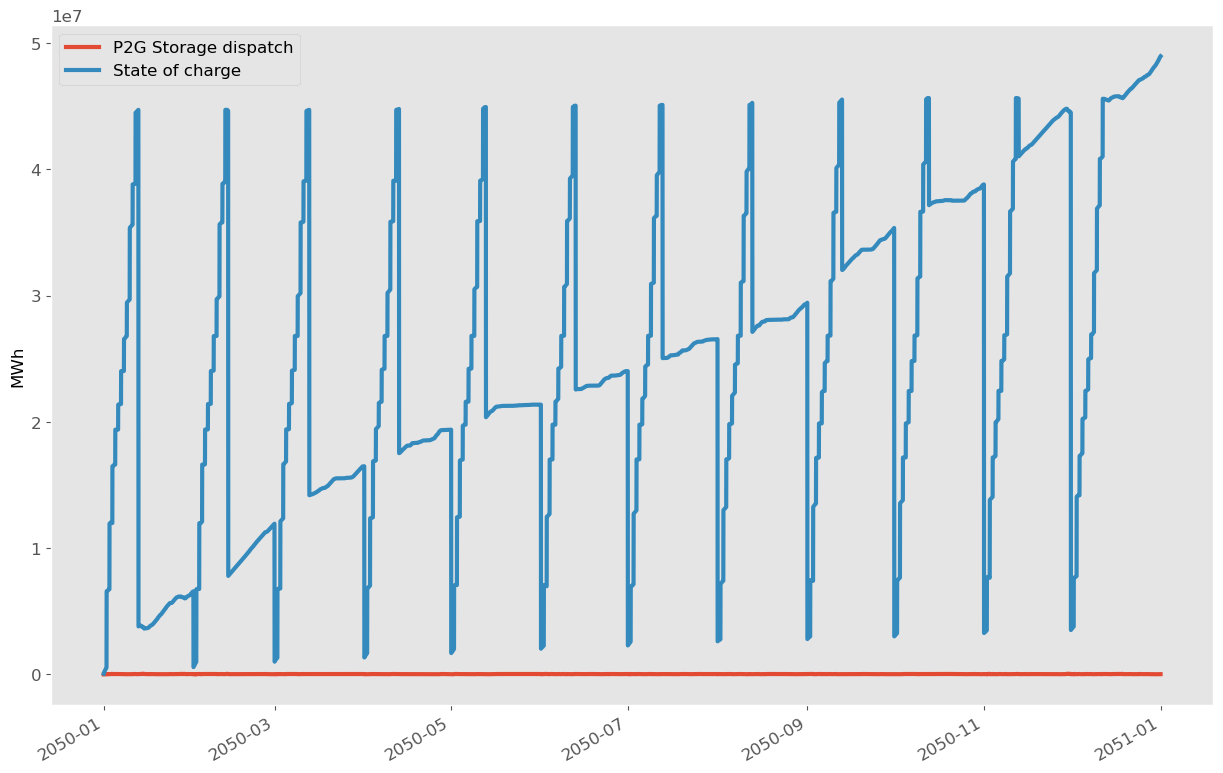

In [34]:
network.storage_units_t.state_of_charge.iloc[: , 91:120].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 91:120].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 91:120].sum(axis=1)


p_storage_PumpedHydorES.plot(label="P2G Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

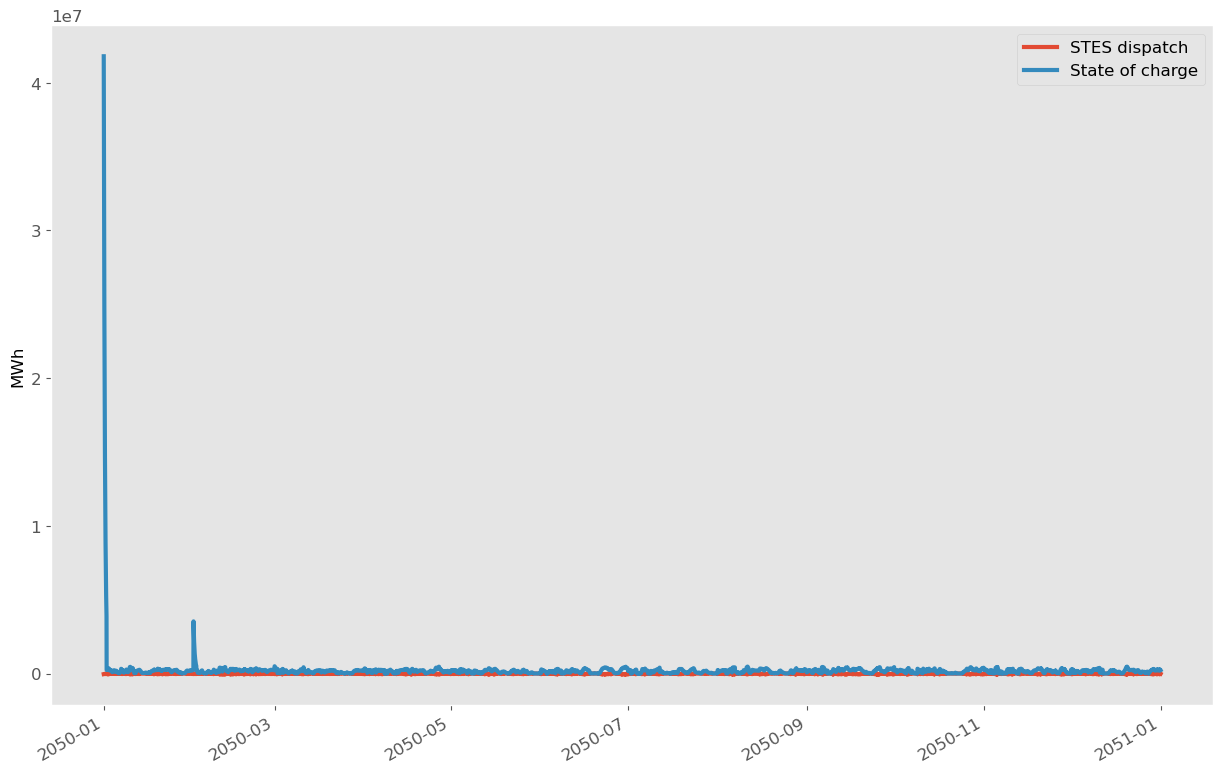

In [35]:
network.storage_units_t.state_of_charge.iloc[: , 120:150].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 120:150].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 120:150].sum(axis=1)


p_storage_PumpedHydorES.plot(label="STES dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

Let us add dditional constraint to the seasonal thermal energy storage and solve our model again with the conservative constraints included on Storages

## Plotting line loading

Look at the line loading stats and graph...

In [36]:
now = network.snapshots[60]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
loading.describe()

With the linear load flow, there is the following per unit loading:


count    99.000000
mean      0.049369
std       0.392946
min      -0.700000
25%      -0.226636
50%       0.061391
75%       0.261610
max       0.700000
dtype: float64

(<matplotlib.collections.PatchCollection at 0x1eafce50f10>,
 <matplotlib.collections.LineCollection at 0x1eafce8e070>)

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


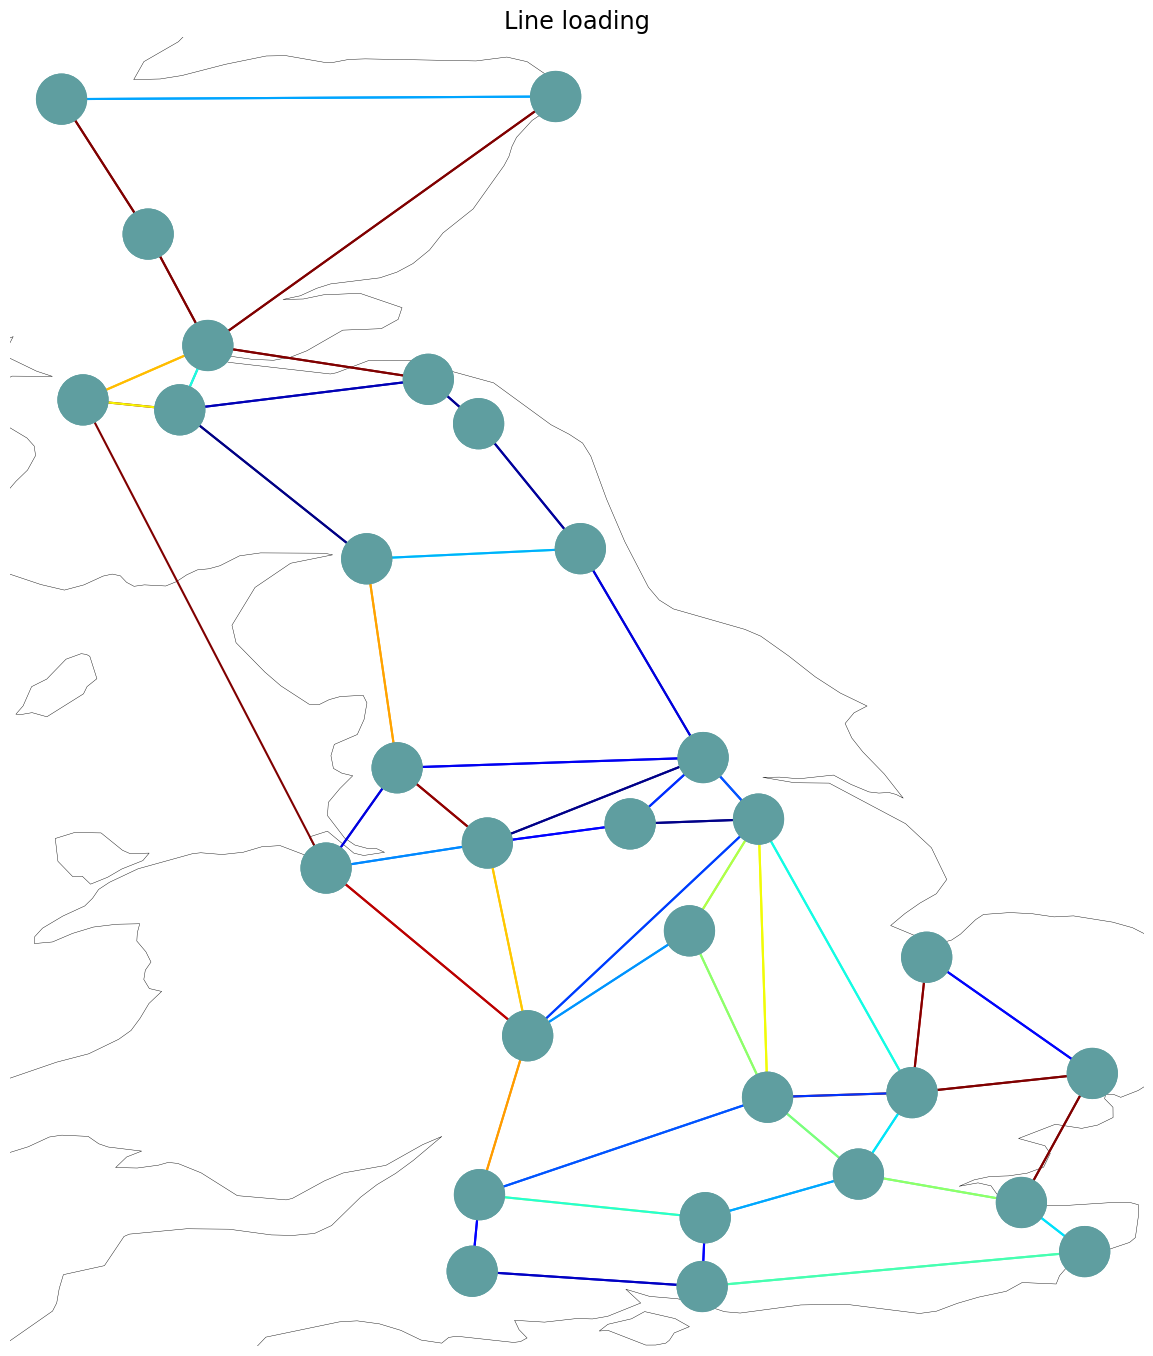

In [37]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)

network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

## Plotting locational marginal prices

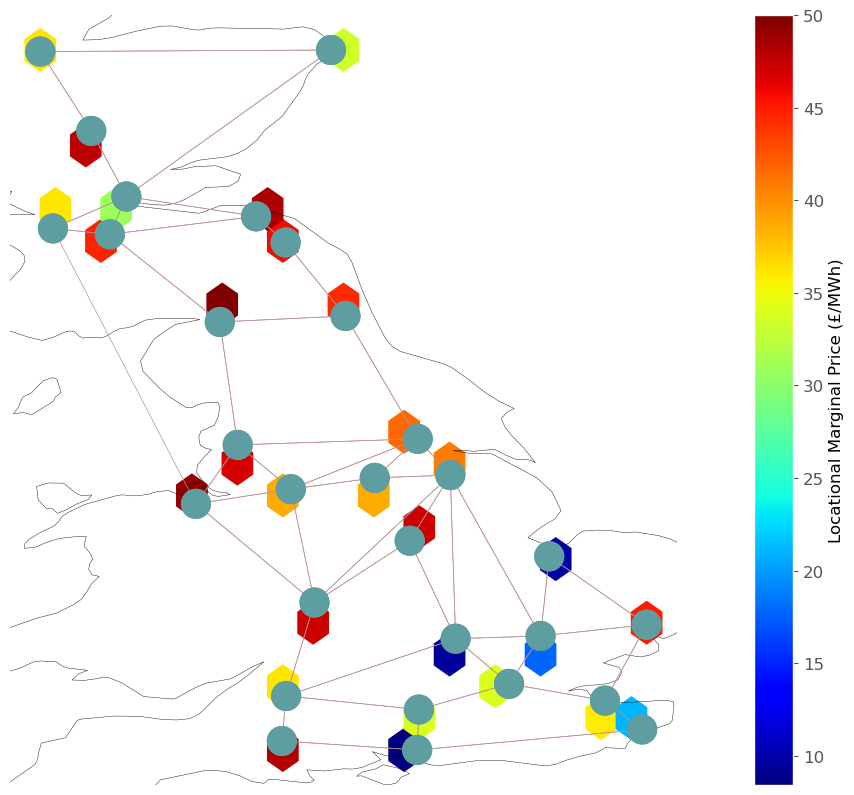

In [38]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

network.plot(ax=ax, line_widths=pd.Series(0.5, network.lines.index))
plt.hexbin(network.buses.x, network.buses.y,
           gridsize=20,
           C=network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

In [39]:
network.buses_t.marginal_price

,Eccles,Errochty,Heat Bus 1,Heat Bus 10,Heat Bus 11,Heat Bus 12,Heat Bus 13,Heat Bus 14,Heat Bus 15,Heat Bus 16,...,Th. Marsh/Stocksbridge,Bramford,Beauly,Penwortham,Denny/Bonnybridge,Harker,Pelham,Neilston,Peterhead,Bramley
snapshot,,,,,,,,,,,,,,,,,,,,,
2050-01-01 00:00:00,34.801126,35.613805,-0.417537,16.816280,20.0,20.0,20.0,20.0,20.000000,20.000000,...,55.298435,0.342650,-1.0,53.57,21.451862,33.773173,-0.118733,-1.0,-1.0,68.377506
2050-01-01 01:00:00,31.614217,32.856832,-0.417537,15.124915,20.0,20.0,20.0,20.0,19.653965,19.334248,...,53.410783,0.384580,-1.0,53.93,19.761265,32.747019,-0.133190,-1.0,-1.0,65.890779
2050-01-01 02:00:00,34.837769,35.732542,-0.417537,16.730369,20.0,20.0,20.0,20.0,19.603070,19.347174,...,53.390000,0.428025,-1.0,54.47,21.524672,34.143541,-0.147579,-1.0,-1.0,66.186387
2050-01-01 03:00:00,34.841433,35.744416,0.034143,16.701927,20.0,20.0,20.0,20.0,19.604649,19.348355,...,53.390000,0.481139,-1.0,54.56,21.531953,34.180578,-0.147579,-1.0,-1.0,66.177303
2050-01-01 04:00:00,34.830440,35.708795,0.037937,16.758908,20.0,20.0,20.0,20.0,19.598778,19.407861,...,53.570000,0.536363,-1.0,54.29,21.510110,34.069467,-0.147579,-1.0,-1.0,66.365120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050-12-31 19:00:00,47.586969,49.393568,20.000000,20.000000,20.0,20.0,20.0,20.0,20.000000,20.000000,...,72.323281,0.000000,-1.0,51.41,47.213172,48.800000,0.000000,46.1,0.0,85.410847
2050-12-31 20:00:00,47.563115,49.393568,20.000000,20.000000,20.0,20.0,20.0,20.0,20.000000,20.000000,...,72.327356,0.000000,-1.0,51.23,47.343568,48.530000,0.000000,47.0,0.0,85.410847
2050-12-31 21:00:00,47.677962,49.393568,20.000000,20.000000,20.0,20.0,20.0,20.0,20.000000,20.000000,...,72.315617,0.000000,-1.0,51.23,47.200139,48.620000,0.000000,46.1,0.0,85.410777


## Plotting curtailment

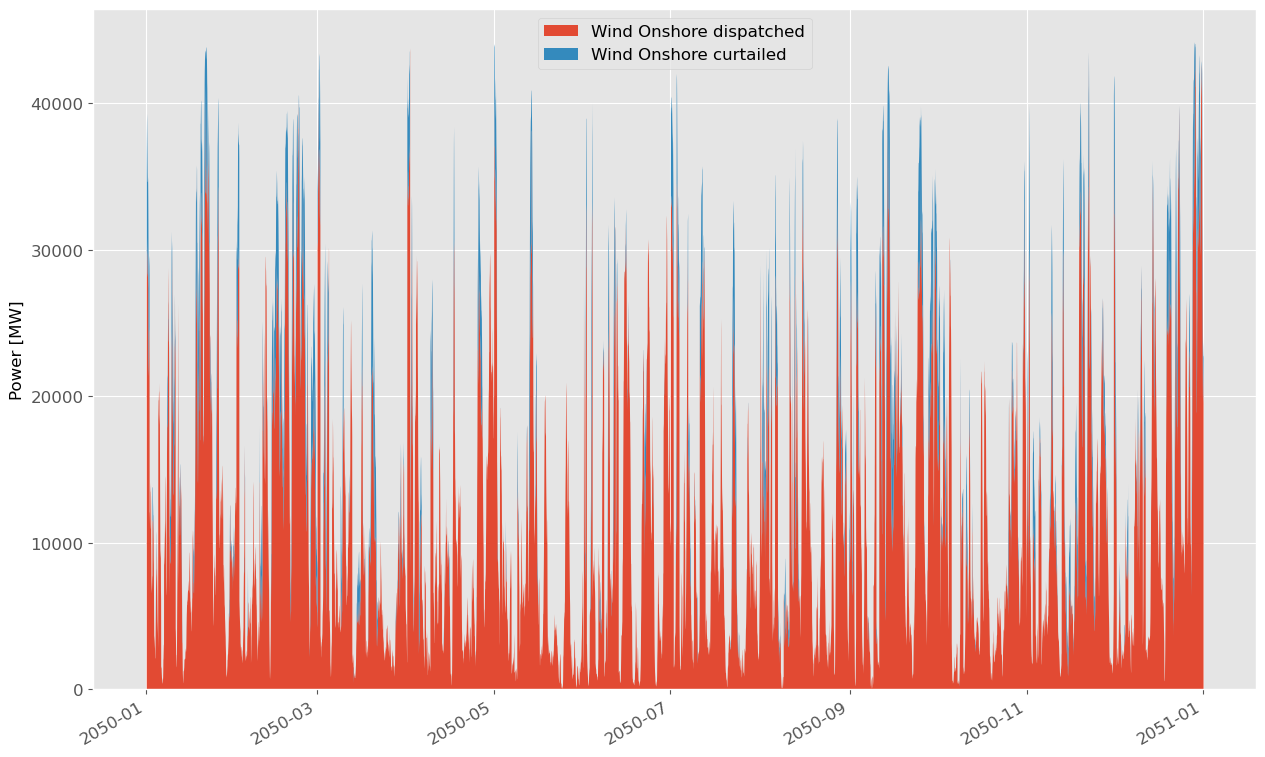

In [40]:
carrier = "Wind Onshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
# p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

In [41]:
network.export_to_csv_folder('LOPF_data_heat_2050/exports')

INFO:pypsa.io:Exported network exports has loads, buses, lines, links, storage_units, generators
